# Introduction to Computational Calculation of Phase Diagrams Using PyCALPHAD
## Vahid Attari, attari.v@tamu.edu
### Department of Materials Sceicene and Engineering
### Texas A&M University
#### PyCALPHAD Tutorial 1

## Outline
- What is phase diagram?
- Contents of a Thermodynamic TDB database
- Calculate a binary phase diagram - PbSn, CuSn
- Calculate equilibirum conditions
- Lever rule
- Isothermal diffusion lines
- More properties
- Free energy curves
- Ternary phase diagram of Pb-Sn-Cu system at different isothermal temperat

### What is phase diagram?
A phase diagram is a type of chart used to show conditions (pressure, temperature, volume, etc.) at which thermodynamically distinct phases (such as solid, liquid or gaseous states) occur and coexist at equilibrium.

<h3><center>"A simple binary eutectic phase diagram"</center></h3>

![alternatvie text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Eutektikum_new.svg/1920px-Eutektikum_new.svg.png)

Binary eutectics are formed from two different substances that are completely miscible in the liquid state but only partially miscible in solid state. At the eutectic point, the three phases are in equilibrium.  

(11) (PDF) Guide on secondary thermometry: specialised fixed points above 0°C. Available from: https://www.researchgate.net/publication/321885305_Guide_on_secondary_thermometry_specialised_fixed_points_above_0C [accessed Apr 01 2023].

<h3><center>"A simple binary peritectic phase diagram"</center></h3>

![alternatvie text](https://www.researchgate.net/publication/321885305/figure/fig2/AS:572965671706624@1513617069622/A-simple-binary-peritectic-phase-diagram.png)

The binary peritectic has some similarities with the eutectic except that the peritectic temperature, $T_P$, lies between the melting points of the pure components A and B. As with the eutectic, the peritectic temperature occurs when three phases, $\alpha$, $\beta$ and the liquid $L$, are in equilibrium, but unlike the eutectic, the transformation oncooling is from liquid plus the $\alpha$ phase to the $\beta$ phase only 

(11) (PDF) Guide on secondary thermometry: specialised fixed points above 0°C. Available from: https://www.researchgate.net/publication/321885305_Guide_on_secondary_thermometry_specialised_fixed_points_above_0C [accessed Apr 01 2023].

#### Types:
2-D diagrams (binary) and 3-D diagrams (Ternary)

#### Interpreting Phase diagrams:

- How many phases exist at a given equilibrium state?
- Which phases are they?
- What are the thermodynamic states of each of the phases?
- What are the amounts and compositions of each of the phases at a given equilibrium state?
- What happens when you change the thermodynamic conditions? What is the new equilibrium state?

### Content of a database file (e.g., a tdb file):
- Who created the database
- The elements block (including 'VA' for vacancies)
- Thermodynamic info about component elements
- Phase data: Liquid, Solid solutions, Stochiometric phases, Complex intermetallic phases, etc.

In [1]:
count = 0 
with open("Cu_Pb_Sn_mie.tdb") as fp: 
    Lines = fp.readlines()
for line in Lines[:-20]:
    count += 1
    print("Line{}: {}".format(count, line.strip()))

Line1: 
Line2: $ Database file written 10- 5-26
Line3: $
Line4: ELEMENT /-   ELECTRON_GAS              0.0000E+00  0.0000E+00  0.0000E+00!
Line5: ELEMENT VA   VACUUM                    0.0000E+00  0.0000E+00  0.0000E+00!
Line6: ELEMENT CU   FCC_A1                    6.3546E+01  5.0041E+03  3.3150E+01!
Line7: ELEMENT PB   FCC_A1                    2.0720E+02  6.8785E+03  6.4785E+01!
Line8: ELEMENT SN   BCT_A5                    1.1869E+02  6.3220E+03  5.1195E+01!
Line9: 
Line10: 
Line11: FUNCTION GHSERCU    2.98000E+02  -7770.458+130.485235*T-24.112392*T*LN(T)
Line12: -.00265684*T**2+1.29223E-07*T**3+52478*T**(-1);  1.35777E+03  Y
Line13: -13542.026+183.803828*T-31.38*T*LN(T)+3.64167E+29*T**(-9);
Line14: 3.20000E+03  N !
Line15: FUNCTION GHSERPB    2.98000E+02  -7650.085+101.715188*T-24.5242231*T*LN(T)
Line16: -.00365895*T**2-2.4395E-07*T**3;  6.01000E+02  Y
Line17: -10531.115+154.258155*T-32.4913959*T*LN(T)+.00154613*T**2
Line18: +8.05644E+25*T**(-9);  1.20000E+03  Y
Line19: +4157.596+

### Load required modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, calculate, variables as v
from pycalphad.plot.utils import phase_legend
import numpy as np
import os
from pycalphad import binplot

### Load a database

In [3]:
### Load a database:
dbf = Database('Cu_Pb_Sn_mie.tdb') # 1. Al-Li-Mg.tdb 2. Al_Li_Zn_Guo

print(type(dbf))
print(dbf)
#print(dbf.__dict__)

<class 'pycalphad.io.database.Database'>
Elements: ['/-', 'CU', 'PB', 'SN', 'VA']
Species: [Species('/-', '/-1'), Species('CU', 'CU1'), Species('PB', 'PB1'), Species('SN', 'SN1'), Species('VA', 'VA1')]
Phase({'name': 'BCC_A2', 'constituents': (frozenset({Species('CU', 'CU1'), Species('SN', 'SN1'), Species('PB', 'PB1')}), frozenset({Species('VA', 'VA1')})), 'sublattices': (1.0, 3.0), 'model_hints': {'ihj_magnetic_afm_factor': -1.0, 'ihj_magnetic_structure_factor': 0.4}})
Phase({'name': 'CU3SN', 'constituents': (frozenset({Species('CU', 'CU1')}), frozenset({Species('SN', 'SN1')})), 'sublattices': (0.75, 0.25), 'model_hints': {}})
Phase({'name': 'CU41SN11', 'constituents': (frozenset({Species('CU', 'CU1')}), frozenset({Species('SN', 'SN1')})), 'sublattices': (0.788, 0.212), 'model_hints': {}})
Phase({'name': 'FCC_A1', 'constituents': (frozenset({Species('CU', 'CU1'), Species('SN', 'SN1'), Species('PB', 'PB1')}), frozenset({Species('VA', 'VA1')})), 'sublattices': (1.0, 1.0), 'model_hints':

## Check important database info

In [4]:
### Check the existing elements
dbf.elements

{'/-', 'CU', 'PB', 'SN', 'VA'}

In [5]:
### Check the existing species
dbf.species 

{Species('/-', '/-1'),
 Species('CU', 'CU1'),
 Species('PB', 'PB1'),
 Species('SN', 'SN1'),
 Species('VA', 'VA1')}

In [6]:
### Check the existing phases
dbf.phases.keys() 

dict_keys(['LIQ', 'FCC_A1', 'BCC_A2', 'GAMSOL', 'CU41SN11', 'CU3SN'])

In [7]:
## Check the constitunets of a phase
print(dbf.phases['CU3SN'].constituents) # 1. ALMG_GAMMA 2. 

(frozenset({Species('CU', 'CU1')}), frozenset({Species('SN', 'SN1')}))


In [8]:
### Check the existing reference states
dbf.refstates 

{'/-': {'phase': 'ELECTRON_GAS', 'mass': 0.0, 'H298': 0.0, 'S298': 0.0},
 'VA': {'phase': 'VACUUM', 'mass': 0.0, 'H298': 0.0, 'S298': 0.0},
 'CU': {'phase': 'FCC_A1', 'mass': 63.546, 'H298': 5004.1, 'S298': 33.15},
 'PB': {'phase': 'FCC_A1', 'mass': 207.2, 'H298': 6878.5, 'S298': 64.785},
 'SN': {'phase': 'BCT_A5', 'mass': 118.69, 'H298': 6322.0, 'S298': 51.195}}

In [9]:
### Check the existing functions and symbols
dbf.symbols 

{'GHSERCU': Piecewise((-7770.458 + 130.485235*T - 24.112392*T*log(T) + 52478.0*T**(-1.0) - 0.00265684*T**2.0 + 1.29223e-07*T**3.0, And(T < 1357.77, 298.0 <= T)), (-13542.026 + 183.803828*T - 31.38*T*log(T) + 3.64167e+29*T**(-9.0), And(T < 3200.0, 1357.77 <= T)), (0, True)),
 'GHSERPB': Piecewise((-7650.085 + 101.715188*T - 24.5242231*T*log(T) - 0.00365895*T**2.0 - 2.4395e-07*T**3.0, And(T < 601.0, 298.0 <= T)), (-10531.115 + 154.258155*T - 32.4913959*T*log(T) + 8.05644e+25*T**(-9.0) + 0.00154613*T**2.0, And(T < 1200.0, 601.0 <= T)), (4157.596 + 53.154045*T - 18.9640637*T*log(T) + 8.05644e+25*T**(-9.0) - 2696755.0*T**(-1.0) - 0.002882943*T**2.0 + 9.8144e-08*T**3.0, And(T < 5000.0, 1200.0 <= T)), (0, True)),
 'GHSERSN': Piecewise((-5855.135 + 65.443315*T - 15.961*T*log(T) - 61960.0*T**(-1.0) - 0.0188702*T**2.0 + 3.121167e-06*T**3.0, And(T < 505.08, 250.0 <= T)), (2524.724 + 4.005269*T - 8.2590486*T*log(T) - 1.2307e+25*T**(-9.0) - 1081244.0*T**(-1.0) - 0.016814429*T**2.0 + 2.623131e-06*T*

In [10]:
### Check the existing references
dbf.references 

{}

## Calculate phase diagram

['VA', 'CU', 'PB', 'SN', '/-']
['VA', 'PB', 'SN']


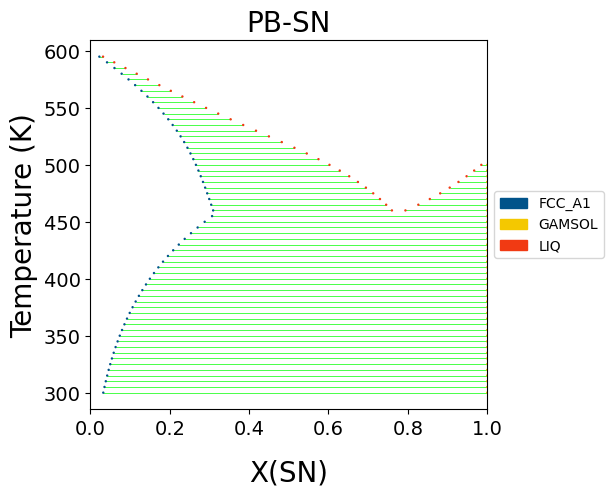

In [11]:
print(list(dbf.elements))

# Define the components
comps = list(dbf.elements)     #['CU', 'PB', 'SN']
comps.remove('/-')
comps.remove('CU') # 
print(comps)

# Get all possible phases programmatically
phases = dbf.phases.keys()

# Plot the phase diagram, if no axes are supplied, a new figure with axes will be created automatically
binplot(dbf, comps, phases, {v.N: 1, v.P:101325, v.T: (300, 1500, 5), v.X('SN'):(0, 1, 0.02)})

plt.show()

['VA', 'CU', 'PB', 'SN', '/-']
['VA', 'CU', 'SN']


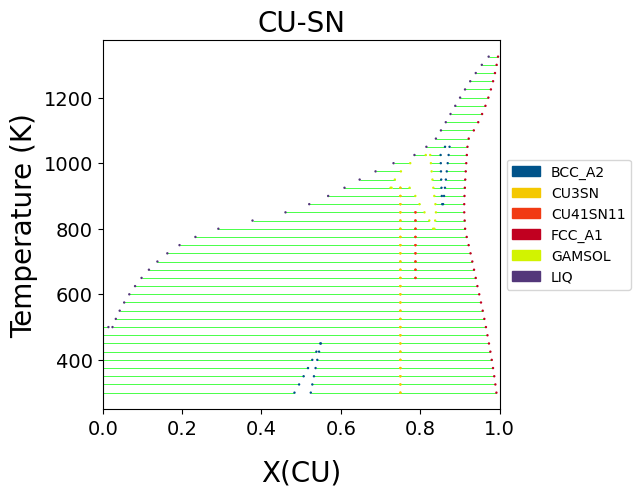

In [20]:
print(list(dbf.elements))

# Define the components
comps = list(dbf.elements)     
comps.remove('/-')
comps.remove('PB') 
print(comps)

# Get all possible phases programmatically
phases = dbf.phases.keys()

# Plot the phase diagram, if no axes are supplied, a new figure with axes will be created automatically
binplot(dbf, comps, phases, {v.N: 1, v.P:101325, v.T: (300, 1500, 25), v.X('CU'):(0, 1, 0.02)})

plt.show()

## Add an isothermal diffusion line to T=400K
- What phases it passes?

['VA', 'PB', 'SN']


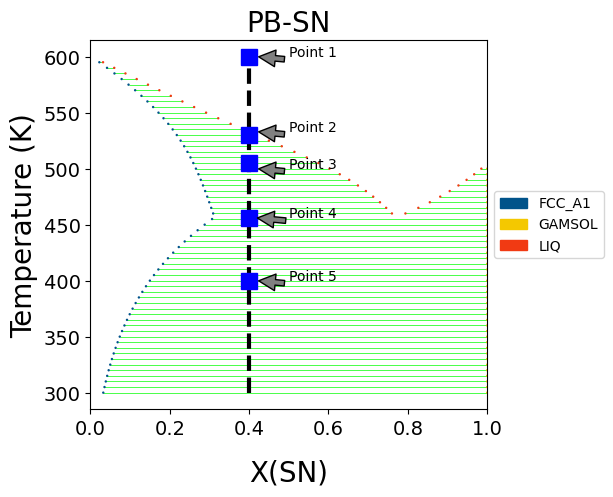

In [13]:
# Load database
#dbf = Database('mmc1-2.tdb') # AlZn_Cui.tdb
# Define the components
comps = list(dbf.elements)     #['AL', 'Zn', 'VA']
comps.remove('/-')
comps.remove('CU') # 1. MG 2. ZN
print(comps)

# Get all possible phases programmatically
phases = dbf.phases.keys()

#fig = plt.figure(figsize=(9,6))

# Plot the phase diagram, if no axes are supplied, a new figure with axes will be created automatically
binplot(dbf, comps, phases, {v.N: 1, v.P:101325, v.T: (300, 1500, 5), v.X('SN'):(0, 1, 0.02)})

# line
plt.plot([0.4, 0.4], [300, 600], color='black', linewidth=3, linestyle='--')

# point 1
T1 = 600 
plt.plot([0.4], [T1], 's', markersize=12, color='blue')
plt.annotate('Point 1',xy = (0.42,T1), xytext=(0.5, T1), arrowprops=dict(facecolor='gray', shrink=0.05))

T2 = 530
plt.plot([0.4], [T2], 's', markersize=12, color='blue')
plt.annotate('Point 2',xy = (0.42,533), xytext=(0.5, 533), arrowprops=dict(facecolor='gray', shrink=0.05))

# point 3
T3 = 505
plt.plot([0.4], [T3], 's', markersize=12, color='blue')
plt.annotate('Point 3',xy = (0.42,500), xytext=(0.5, 500), arrowprops=dict(facecolor='gray', shrink=0.05))

T4 = 183+273
plt.plot([0.4], [T4], 's', markersize=12, color='blue')
plt.annotate('Point 4',xy = (0.42,T4), xytext=(0.5, T4), arrowprops=dict(facecolor='gray', shrink=0.01))

T5 = 400
plt.plot([0.4], [T5], 's', markersize=12, color='blue')
plt.annotate('Point 5',xy = (0.42,T5), xytext=(0.5, T5), arrowprops=dict(facecolor='gray', shrink=0.05))


plt.show()

## The lever rule

![alternatvie text](https://www.doitpoms.ac.uk/tlplib/phase-diagrams/images/diagram31.gif)

fraction of phase 1 = (C2 - C) / (C2 - C1)

and,

fraction of phase 2 = (C - C1) / (C2 - C1).

## Calculate an equilibrium condition

### Calculation Conditions
In any thermodynamic calculation, $c+2$ conditions must be defined for "$c$" components. 
- Unary system: 1 component + 2 additional conditions
- Binary system: 2 components + 2 additional conditions
- Ternary system: 3 components + 2 additional conditions

-- Pressure: v.P in Pacals. Usually (but not always) thermodyanmic databases do not consider pressure and thus you use standard pressure, 101325 Pa by convention.

-- Temperature: v.T in Kelvin.

-- Composition: v.X('LI') as a mole fraction.

In [14]:
from pycalphad import equilibrium

comps = list(dbf.elements)     #['AL', 'Zn', 'VA']
comps.remove('/-')
comps.remove('CU') # 1. MG 2. ZN
print(comps)

# Get all possible phases programmatically
phases = dbf.phases.keys()
print(phases)
#phases = ['LIQ','FCC_A1']

# And the conditions:
# We want to see which phases are presnt when 60% LI is in AL-LI alloy 
# This is a map of the variable to its value
conditions = {
    v.P: 101325,
    v.T: [T1,T2,T3,T4,T5],
    v.X('SN'): 0.40,
        }

# do the equlibrium calculation and store the result in the `eq` variable
eq = equilibrium(dbf, comps, phases, conditions)

['VA', 'PB', 'SN']
dict_keys(['LIQ', 'FCC_A1', 'BCC_A2', 'GAMSOL', 'CU41SN11', 'CU3SN'])


### Calculated information:
- NP: the phase fraction
- GM: the molar Gibbs free energy
- MU: the chemical potentials
- X: The overall composition of each element in each phase (the constitution)
- Y: The site fractions (compositions of each sublattice) in each phase 
- Phase: the name of the stable phase

## We can calculate more properties...
- Heat capacity
- Degree of ordering
- etc.

In [15]:
## The name of the stable phase at requested conditions:
print(eq.Phase.values.squeeze())

## The phase fractions at requested conditions:
print(eq.NP.values.squeeze())

[['LIQ' '' '']
 ['FCC_A1' 'LIQ' '']
 ['FCC_A1' 'LIQ' '']
 ['FCC_A1' 'GAMSOL' '']
 ['FCC_A1' 'GAMSOL' '']]
[[1.                nan        nan]
 [0.08683985 0.91316015        nan]
 [0.55395817 0.44604183        nan]
 [0.87011987 0.12988013        nan]
 [0.70576316 0.29423684        nan]]


## Calculate free energy curves for the phases that path a isothermal line Temp=400K

[['LIQ' '' '']
 ['FCC_A1' 'LIQ' '']
 ['FCC_A1' 'LIQ' '']
 ['FCC_A1' 'GAMSOL' '']
 ['FCC_A1' 'GAMSOL' '']]


/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


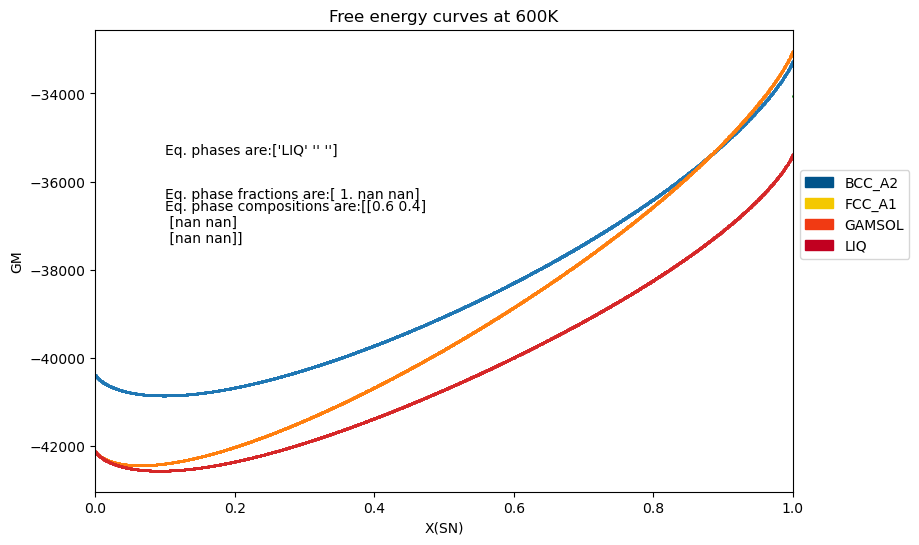

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


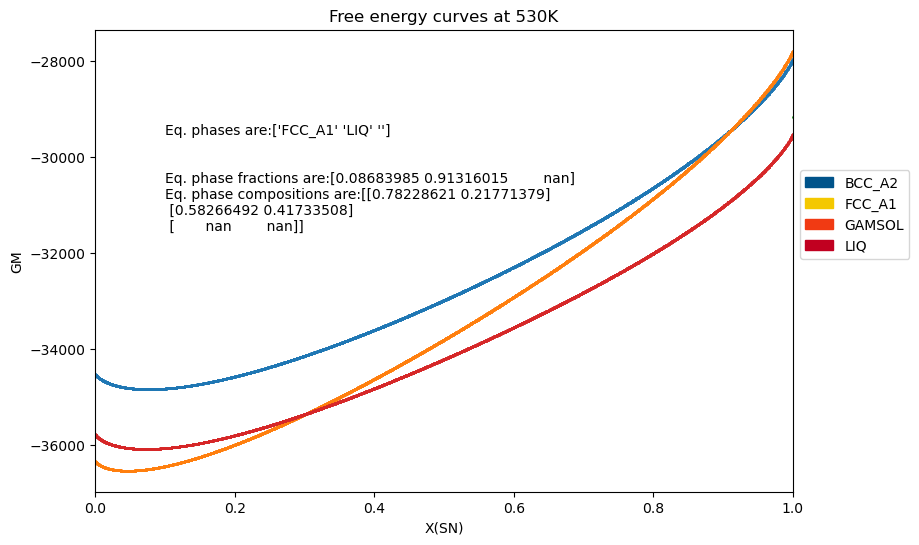

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


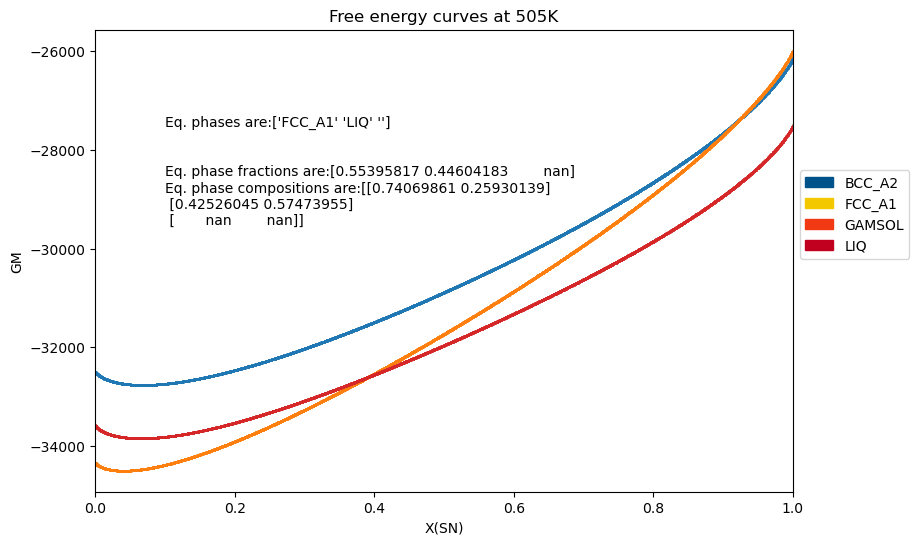

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


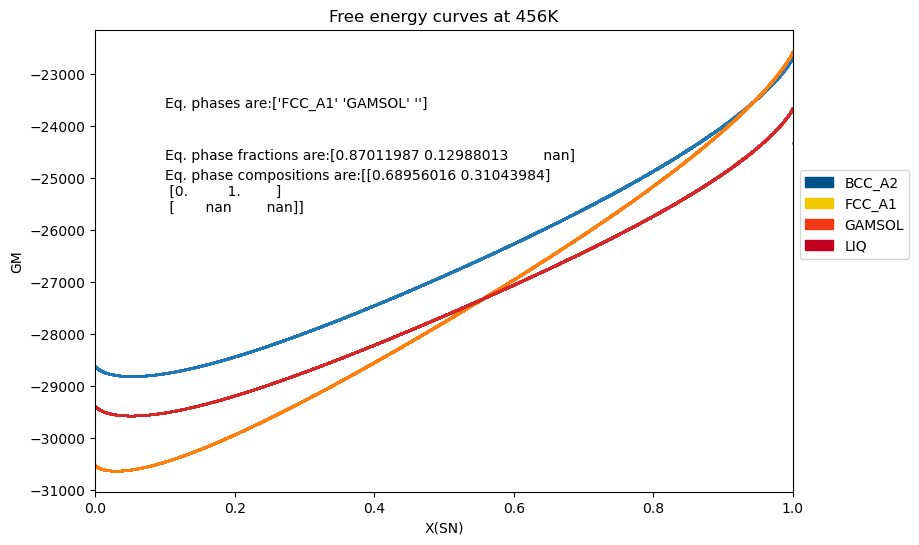

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


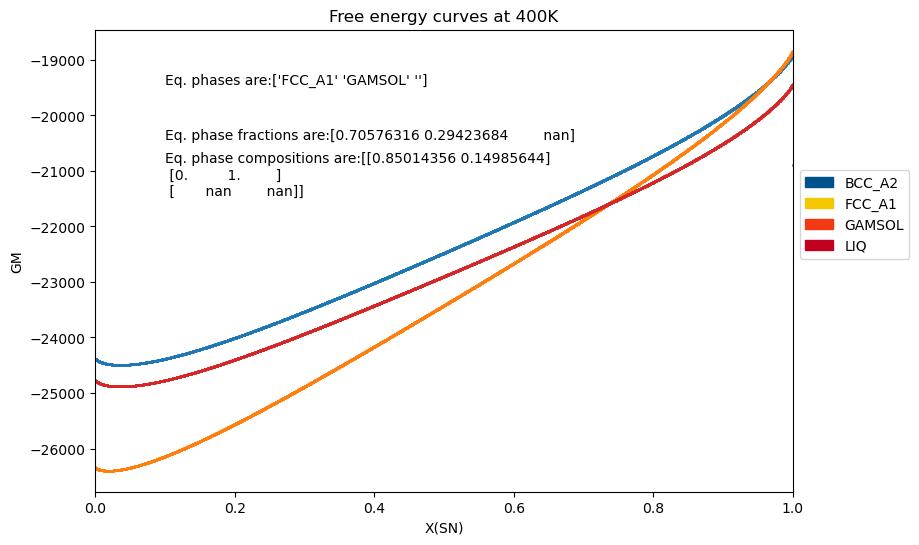

In [16]:
#phases = ['AL4LI9','AL2LI3','LIQUID','B32','FCC_A1','BCC_A2']
#phases = list(dbf.phases.keys())
phases = list(dbf.phases.keys() )
phases = ['BCC_A2', 'FCC_A1', 'GAMSOL', 'LIQ']

print(eq.Phase.values.squeeze())

# Get the colors that map phase names to colors in the legend
legend_handles, colorlist = phase_legend(sorted(phases))


# Loop over phases, calculate the Gibbs energy, and scatter plot GM vs. X(RE)
k = 0
for temp in [T1,T2,T3,T4,T5]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    for phase_name in phases:
        result = calculate(dbf, comps, phase_name, P=101325, T=temp, output='GM')
        ax.scatter(result.X.sel(component='SN'), result.GM, marker='.', s=5)
    ax.annotate('Eq. phases are:'+str( eq.Phase.values.squeeze()[k] ),xy = (0.1,np.max(result.GM)), xytext=(0.1, np.max(result.GM)))
    ax.annotate('Eq. phase fractions are:'+str( eq.NP.values.squeeze()[k] ),xy = (0.1,np.max(result.GM)), xytext=(0.1, np.max(result.GM)-1000))
    ax.annotate('Eq. phase compositions are:'+str( eq.X.values.squeeze()[k] ),xy = (0.1,np.max(result.GM)), xytext=(0.1, np.max(result.GM)-2000))

    # Format the plotgege
    ax.set_title('Free energy curves at '+str(temp)+'K' )
    ax.set_xlabel('X(SN)')
    ax.set_ylabel('GM')
    ax.set_xlim((0, 1))
    ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
    k = k+1

    ## common tangent line
    #ax.plot([0, 0.5], [-12000, -30000], color='black', linewidth=3, linestyle='--')

    plt.show()

## Ternary phase diagram of Pb-Sn-Cu system at different isothermal temperatures

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in scalar divide
  result_array_GM_values[it.multi_index] = new_energy / molesum


CPU times: user 19.5 s, sys: 91.3 ms, total: 19.6 s
Wall time: 19.6 s


/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in scalar divide
  result_array_GM_values[it.multi_index] = new_energy / molesum


CPU times: user 2.82 s, sys: 44.1 ms, total: 2.86 s
Wall time: 2.84 s


/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in scalar divide
  result_array_GM_values[it.multi_index] = new_energy / molesum


CPU times: user 3.61 s, sys: 40 ms, total: 3.65 s
Wall time: 3.63 s


/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in scalar divide
  result_array_GM_values[it.multi_index] = new_energy / molesum


CPU times: user 10.4 s, sys: 127 ms, total: 10.5 s
Wall time: 10.5 s


/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/lower_convex_hull.py:145: RuntimeWarning: invalid value encountered in scalar divide
  result_array_GM_values[it.multi_index] = new_energy / molesum


CPU times: user 4.07 s, sys: 53 ms, total: 4.12 s
Wall time: 4.13 s


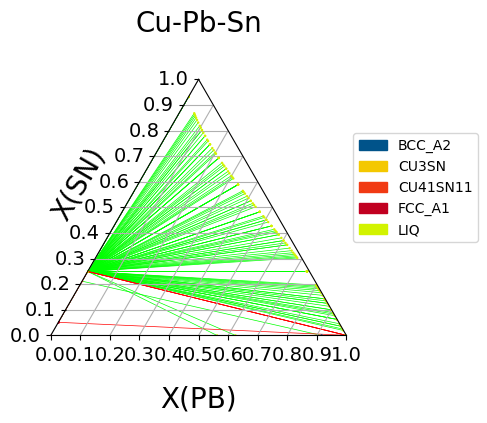

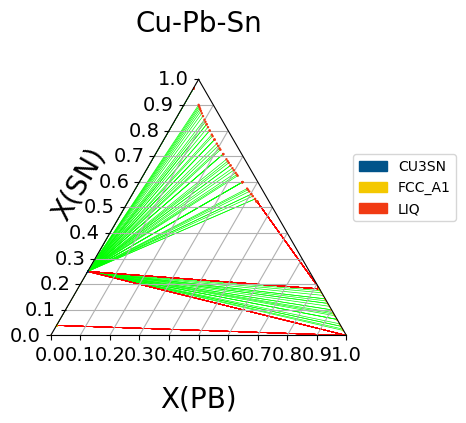

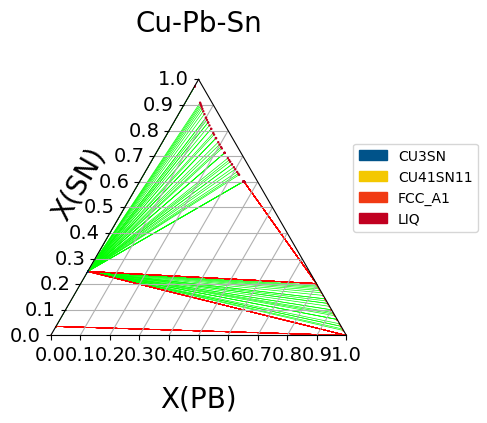

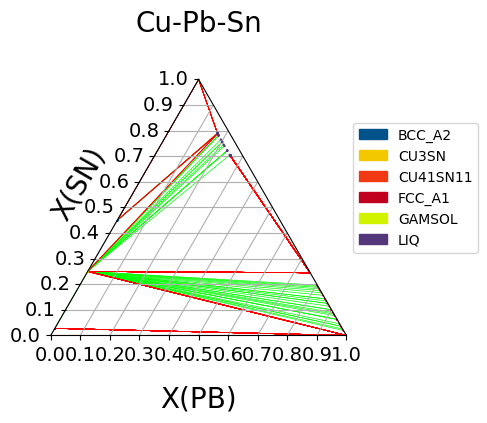

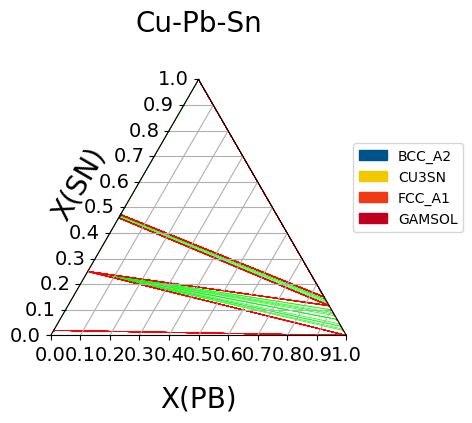

In [17]:
%matplotlib inline
from pycalphad import Database, ternplot

temp = 800

comps = list(dbf.elements)     #['PB', 'SN', 'CU']
comps.remove('/-')

phases = list(dbf.phases.keys())

for temp in [T1,T2,T3,T4,T5]:
    conds = {v.T: temp, v.P:101325, v.X('PB'): (0,1,0.05), v.X('SN'): (0,1,0.05)}

    %time ternplot(dbf, comps, phases, conds, x=v.X('PB'), y=v.X('SN'))

/Users/attari.v/opt/anaconda3/envs/pycalphad-env/lib/python3.8/site-packages/pycalphad/core/utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]
/var/folders/fg/7pkbcwl541z6yd65h03wxjbc0000gp/T/ipykernel_6317/1238867394.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cm);


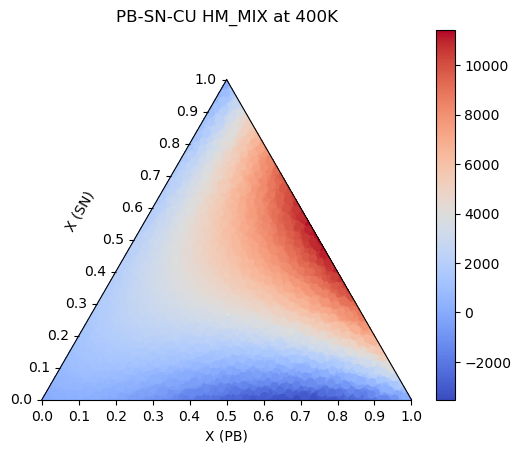

In [18]:
from pycalphad.plot import triangular
from pycalphad import calculate

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K.
c = calculate(dbf, comps, 'FCC_A1', output='HM_MIX', T=temp, P=101325, pdens=5000)

# Here we are getting the values from our plot.
xs = c.X.values[0, 0, 0, :, 0]  # 1D array of Al compositions
ys = c.X.values[0, 0, 0, :, 1]  # 1D array of Cu compositions
zs = c.HM_MIX.values[0, 0, 0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.add_subplot(projection='triangular')
ax.scatter(xs, ys, c=zs,
           cmap='coolwarm',
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (PB)')
ax.set_ylabel('X (SN)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('PB-SN-CU HM_MIX at '+str(temp)+'K')

# set up the colorbar
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm);

## A Few points about enthalpy of mixing:
- The enthalpy of mixing is the amount of energy that is released or absorbed from a substance upon mixing.
- Enthalpy of mixing is often calculated experimentally using calorimetry methods.
- In ideal mixtures, the enthalpy of mixing is null. 
